## Mnist original

vorrei ottenere un risultato come quello che mostra qui: http://peekaboo-vision.blogspot.com/2012/12/kernel-approximations-for-efficient.html

In [1]:
%run -i 'functions.py'
%run -i 'encode_csv.py'

Using TensorFlow backend.


In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
digits = X_train

print("train:", X_train.shape, ", test:", X_test.shape)

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# print(X_train.shape)
# normalize from 0-255 to 0-1
X_train = X_train // 255
X_test = X_test // 255

# now to -1 - 1
train_mean = X_train.mean(axis=0)
test_mean = X_test.mean(axis=0)

X_train -= train_mean
X_test -= test_mean

# not taking the whole dataset

# n = 1000
# X_train = X_train[:n]
# y_train = y_train[:n]
# X_test = X_test[:n//20]
# y_test = y_test[:n//20]

print("train:", X_train.shape, ", test:", X_test.shape)

train: (60000, 28, 28) , test: (10000, 28, 28)
train: (60000, 784) , test: (10000, 784)


In [41]:
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import random

In [56]:
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.03, 0.01, 0.001], 'kernel': ['rbf']}
    
# scores = ['precision', 'recall']

In [57]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = svm.SVC(kernel='rbf')
    grid_search = GridSearchCV(clf, param_grid, cv=5,
                       scoring='%s_weighted' % score)
    grid_search.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(grid_search.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in grid_search.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.153 (+/-0.128) for {'C': 1, 'gamma': 0.03, 'kernel': 'rbf'}
0.151 (+/-0.149) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.013 (+/-0.001) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.270 (+/-0.067) for {'C': 10, 'gamma': 0.03, 'kernel': 'rbf'}
0.324 (+/-0.158) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.142 (+/-0.078) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.263 (+/-0.104) for {'C': 100, 'gamma': 0.03, 'kernel': 'rbf'}
0.258 (+/-0.100) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.326 (+/-0.153) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.258 (+/-0.109) for {'C': 1000, 'gamma': 0.03, 'kernel': 'rbf'}
0.265 (+/-0.101) for {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
0.257 (+/-0.096) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

# Tuning hyper-parameters for recall

Best parameters set found on 

In [53]:
C = [int(x) for x in np.linspace(10,1000, 50)]
gamma = [random.uniform(0.000001,10**(-10)) for _ in range(100)]

random_grid = {'C': C, 'gamma': gamma}

In [59]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = svm.SVC(kernel='rbf')
    random_search = RandomizedSearchCV(estimator=clf, param_distributions=random_grid, cv=5)
    random_search.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(random_search.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in random_search.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

# Tuning hyper-parameters for 0.2647058823529412

Best parameters set found on development set:

{'gamma': 4.0969183196525946e-07, 'C': 232}

Grid scores on development set:

0.116 (+/-0.003) for {'gamma': 4.0969183196525946e-07, 'C': 232}
0.116 (+/-0.003) for {'gamma': 9.242928928071168e-07, 'C': 959}
0.116 (+/-0.003) for {'gamma': 8.856236875918718e-07, 'C': 919}
0.116 (+/-0.003) for {'gamma': 9.079915109943738e-07, 'C': 696}
0.116 (+/-0.003) for {'gamma': 1.7462546666401966e-07, 'C': 191}
0.116 (+/-0.003) for {'gamma': 1.2019369683335266e-07, 'C': 111}
0.116 (+/-0.003) for {'gamma': 1.0688675495371654e-07, 'C': 30}
0.116 (+/-0.003) for {'gamma': 3.5394074839493167e-07, 'C': 898}
0.116 (+/-0.003) for {'gamma': 9.129413662151138e-07, 'C': 131}
0.116 (+/-0.003) for {'gamma': 5.442325364931185e-07, 'C': 252}

# Tuning hyper-parameters for 0.3399014778325123

Best parameters set found on development set:

{'gamma': 2.768322993601907e-07, 'C': 50}

Grid scores on development set:

0.116 (

In [ ]:
orig_mnist_fit = fit_all(X_train, y_train, X_test, y_test, gamma=0.031)
orig_mnist_fit
save(orig_mnist_fit, 'orig_mnist')

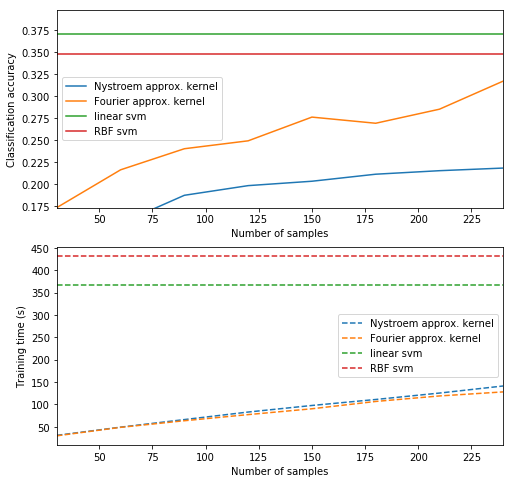

In [8]:
plot_results(orig_mnist_fit)

## Results from bigger samples

Ho mandato qualche job... vediamo i risultati

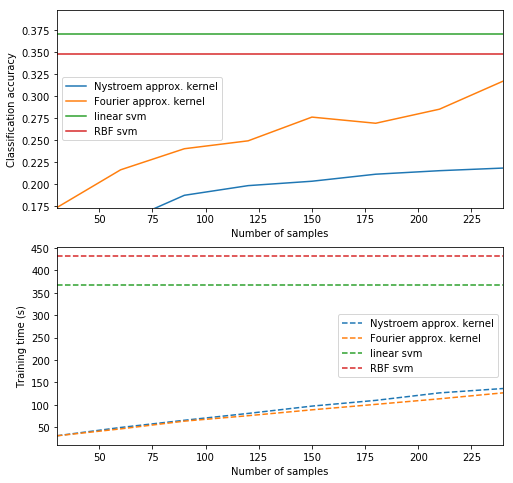

In [5]:
job_results = pickle.load(open('pickle/pickleorig_mnist_script_20000.pickle','rb'))
plot_results(job_results)

the results in accuracy are very bad on 20000 observations... but why? 

qualcosa non va perché nell'esempio i risultati sono molto diversi e ho usato gli stessi identici dati. Faccio altre prove e vediamo come va.

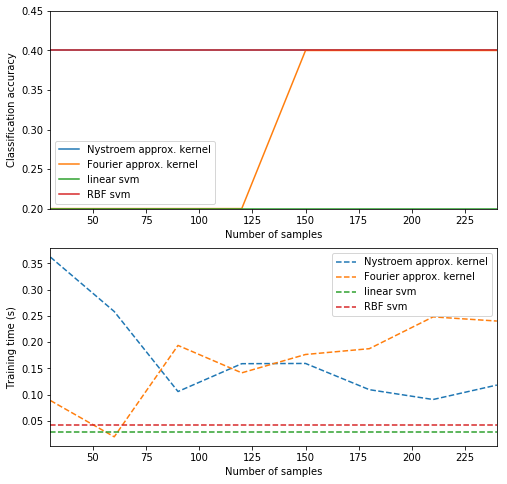

In [4]:
job_results = pickle.load(open('pickle/pickleorig_mnist_20000.pickle','rb'))
plot_results(job_results)

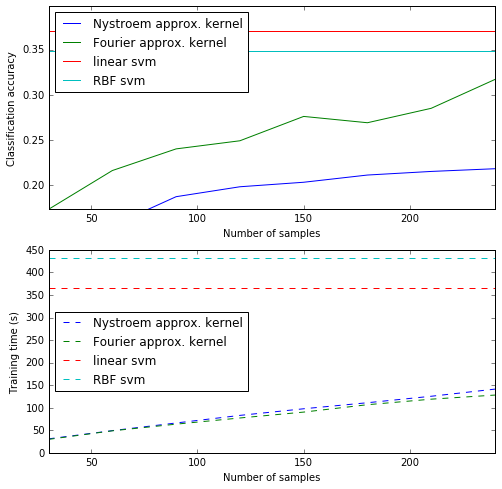

In [2]:
job_results = pickle.load(open('pickle/orig_mnist.pickle','rb'))
plot_results(job_results)

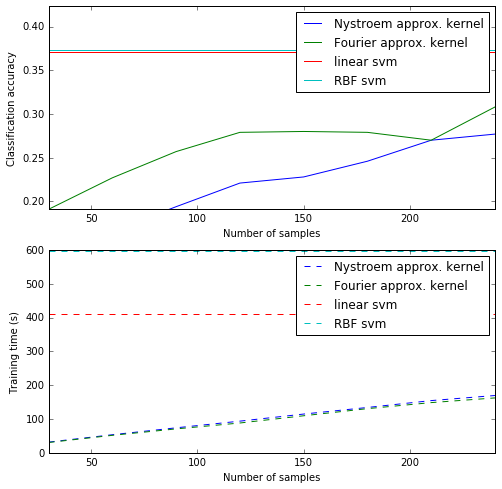

In [3]:
job_results = pickle.load(open('pickle/orig_mnist_script.pickle','rb'))
plot_results(job_results)

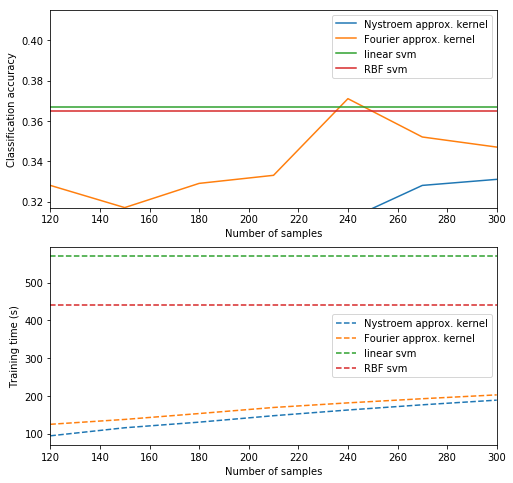

In [3]:
job_results = pickle.load(open('pickle/orig_mnist_20000_marconi.pickle','rb'))
plot_results(job_results)

In [1]:
# # Marconi mnist 40000
# # 1673764 bdw_all_s mnist_or gcarbone PD       0:00      1 (QOSMaxCpuPerUserLimit)

# job_results = pickle.load(open('pickle/','rb'))
# plot_results(job_results)

# # NON ANDATO PER TIME LIMIT!

In [3]:
%run -i 'functions.py'

Using TensorFlow backend.


In [2]:
# Galileo mnist 30000

job_results = pickle.load(open('pickle/mnist','rb'))
plot_results(job_results)


## PCA

Variance in PCA: https://ro-che.info/articles/2017-12-11-pca-explained-variance

Spiegazione precisa della explained variance: https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained

In [3]:
# plotly

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA

from sklearn import svm, pipeline
from sklearn.kernel_approximation import (RBFSampler,Nystroem)
from sklearn import datasets



In [4]:
n = 1000

X = X_train[:n]
y = y_train[:n]


# how many components should I use?

n_components = X.shape[1]

start = time()
pca = PCA(n_components).fit(X)
pca_time = time() - start
X_pca = pca.transform(X)

print("\n\nExplained variance percentage\n")
# cumulative proportion explained variance (often useful in selecting components and estimating the dimensionality 
# of your space by using n_components=dimensionality of the entire dataset):
print("PCA:          ", np.cumsum(pca_explained_var_ratio))
# print("Kernel PCA:   " ,np.cumsum(kpca_explained_var_ratio))
# print("Fourier PCA:  ",np.cumsum(foupca_explained_var_ratio))
# print("Nystroem PCA: ",np.cumsum(nyspca_explained_var_ratio))


10 components should be ok

In [9]:
n = 20000

X = X_train[:n]
y = y_train[:n]

###########################################################

n_components=10

X1, X2 = np.linspace(-0.5, 0.5, 30), np.linspace(-0.5, 0.5, 30)
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

start = time()
pca = PCA(n_components).fit(X)
pca_time = time() - start
X_pca = pca.transform(X)


fourier = RBFSampler(gamma=gamma, random_state=1, n_components=50)
fourier_pca = pipeline.Pipeline([("feature_map", fourier),("pca", PCA(n_components))])
start = time()
fourier_pca.fit(X)
fourier_time = time() - start
X_fourier_pca = fourier_pca.transform(X)


nystroem = Nystroem(gamma=gamma, random_state=1, n_components=50)
nystroem_pca = pipeline.Pipeline([("feature_map", nystroem),("pca", PCA(n_components))])
start = time()
nystroem_pca.fit(X)
nystroem_time = time() - start
X_nystroem_pca = nystroem_pca.transform(X)

gamma = 0.1
kpca = KernelPCA(kernel="rbf", n_components=50, fit_inverse_transform=False, gamma=gamma)
start = time()
kpca = kpca.fit(X)
kpca_time = time() - start
X_kpca = kpca.transform(X)


In [10]:
# explained variance

pca_explained_var = np.var(X_pca, axis=0)
pca_explained_var_ratio = pca_explained_var / np.sum(pca_explained_var)


kpca_explained_var = np.var(X_kpca, axis=0)
kpca_explained_var_ratio = kpca_explained_var / np.sum(kpca_explained_var)

foupca_explained_var = np.var(X_fourier_pca, axis=0)
foupca_explained_var_ratio = foupca_explained_var / np.sum(foupca_explained_var)


nyspca_explained_var = np.var(X_nystroem_pca, axis=0)
nyspca_explained_var_ratio = nyspca_explained_var / np.sum(nyspca_explained_var)

print("\n\nExplained variance\n")
#  is simply the variance of the components.
print("PCA:          ", pca_explained_var[:3]," ..")
print("Kernel PCA:   " ,kpca_explained_var[:3])
print("Fourier PCA:  ",foupca_explained_var[:3])
print("Nystroem PCA: ",nyspca_explained_var[:3])

print("\n\nExplained variance ratio\n")
print("PCA:          ", pca_explained_var_ratio[:3])
print("Kernel PCA:   " ,kpca_explained_var_ratio[:3])
print("Fourier PCA:  ",foupca_explained_var_ratio[:3])
print("Nystroem PCA: ",nyspca_explained_var_ratio[:3])


print("\n\nExecution time (s)\n ")
print("PCA:          ", pca_time)
print("Kernel PCA:   " ,kpca_time)
print("Fourier PCA:  ",fourier_time)
print("Nystroem PCA: ",nystroem_time)



Explained variance

PCA:           [1.0767615  0.17251632 0.16026771]  ..
Kernel PCA:    [0.04455248 0.00388329 0.00378083]
Fourier PCA:   [0.05280394 0.01386613 0.01111522]
Nystroem PCA:  [0.04452722 0.00361673 0.00343708]


Explained variance ratio

PCA:           [0.5328402  0.08537047 0.07930919]
Kernel PCA:    [0.354843   0.03092884 0.03011284]
Fourier PCA:   [0.36885661 0.09686044 0.07764426]
Nystroem PCA:  [0.68685186 0.05578958 0.05301842]


Execution time (s)
 
PCA:           5.437690019607544
Kernel PCA:    589.1665153503418
Fourier PCA:   0.9325525760650635
Nystroem PCA:  1.8425300121307373


In [20]:
# check: all ratios sum up to 1!
for ratio in [pca_explained_var_ratio,kpca_explained_var_ratio,foupca_explained_var_ratio,nyspca_explained_var_ratio]:
    print(sum(ratio))

0.9999998975545168
0.9999999571591616
1.0
1.0000000093132257


In [6]:
# pca projections


colors = ['red','blue','green','yellow','orange','pink', 'black','grey', 'magenta']


projections = []

for i, color in enumerate(colors):

    projection = go.Scatter3d(x=X_pca[y==i, 0], 
                                y=X_pca[y==i, 1],
                                z=X_pca[y==i, 2],
                                 mode='markers',
                                 showlegend=False,
                                 marker=dict(color=color,
                                             line=dict(color='black', width=1))
                                )

    projections.append(projection)
    

layout = go.Layout(title="PCA, time = "+str(pca_time))

fig = go.Figure(data=projections, layout=layout )

    
py.iplot(fig)

In [46]:
plotly.offline.plot(fig,filename='mnist_pca_10000.html')

'file:///galileo/home/userexternal/gcarbone/individual/code/mnist_pca_10000.html'

In [11]:
# Kernel pca

colors = ['red','blue','green','yellow','orange','pink', 'black','grey', 'magenta']


projections = []

for i, color in enumerate(colors):

    projection = go.Scatter3d(x=X_kpca[y==i, 0], 
                                y=X_kpca[y==i, 1],
                                z=X_kpca[y==i, 2],
                                 mode='markers',
                                 showlegend=False,
                                 marker=dict(color=color,
                                             line=dict(color='black', width=1))
                                )

    projections.append(projection)
    

layout = go.Layout(title="Kernel PCA, time = "+str(kpca_time))

fig = go.Figure(data=projections, layout=layout )

    
py.iplot(fig)

In [12]:
plotly.offline.plot(fig,filename='mnist_kpca_20000.html')

'file:///galileo/home/userexternal/gcarbone/individual/code/mnist_kpca_20000.html'

In [15]:
# Fourier


colors = ['red','blue','green','yellow','orange','pink', 'black','grey','magenta']

projections = []

for i, color in enumerate(colors):

    projection = go.Scatter3d(x=X_fourier_pca[y==i, 0], 
                                  y=X_fourier_pca[y==i, 1],
                                  z=X_fourier_pca[y==i, 2],
                                 mode='markers',
                                 showlegend=False,
                                 marker=dict(color=color,
                                             line=dict(color='black', width=1))
                                )

    projections.append(projection)
    

layout = go.Layout(title="Fourier PCA, time = "+str(fourier_time))
fig = go.Figure(data=projections, layout=layout)

    
py.iplot(fig)

In [50]:
plotly.offline.plot(fig,filename='mnist_foupca_10000.html')

'file:///galileo/home/userexternal/gcarbone/individual/code/mnist_foupca_10000.html'

In [13]:
# Nystroem

colors = ['red','blue','green','yellow','orange','pink', 'black','grey','magenta']


projections = []

for i, color in enumerate(colors):

    projection = go.Scatter3d(x=X_nystroem_pca[y==i, 0], 
                                  y=X_nystroem_pca[y==i, 1],
                                  z=X_nystroem_pca[y==i, 2],
                                 mode='markers',
                                 showlegend=False,
                                 marker=dict(color=color,
                                             line=dict(color='black', width=1))
                                )

    projections.append(projection)
    

layout = go.Layout(title="Nystroem PCA, time = "+str(nystroem_time))
fig = go.Figure(data=projections, layout=layout)

    
py.iplot(fig)

In [14]:
plotly.offline.plot(fig,filename='mnist_nyspca_20000.html')

'file:///galileo/home/userexternal/gcarbone/individual/code/mnist_nyspca_20000.html'